### 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
data = pd.read_csv('data/2012FederalElectoralCommission.csv',dtype={'contbr_zip':'str'})#读取数据
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
data.shape#查看形状

(1001731, 16)

### 数据清洗

In [4]:
data.info()#查看基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [5]:
data['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [6]:
def parties(name):
    if name ==  'Obama, Barack':
        return  'Democrat'
    else:
        return 'Repulican'

data['party'] = data['cand_nm'].apply(parties)#基于候选人名字，添加‘party’列
data['party'].unique()

array(['Repulican', 'Democrat'], dtype=object)

In [7]:
data=data[data['contb_receipt_amt']>0]#将小于0的资助滤除

In [8]:
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Repulican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Repulican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Repulican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Repulican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Repulican


In [9]:
list(data['contbr_occupation'].unique())

['RETIRED',
 'INFORMATION REQUESTED',
 'RN',
 'ELECTRICAL ENGINEER',
 'LAND DEVELOPER',
 'PHYSICIAN',
 'OFFICE FURNITURE BROKER',
 'MANAGER',
 'REALTOR',
 'OWNER',
 'MANDARIN TEACHER',
 'PRESIDENT',
 'FREELANCE ANIMATOR',
 'GENERAL MANAGER',
 'ATTORNEY',
 'CEO',
 'EXECUTIVE',
 'CPA',
 'FARM MANAGER',
 'INVESTOR',
 'BUSINESS OWNER',
 'HOMEMAKER',
 'INTERNAL MEDICINE PHY',
 'CHAIRMAN',
 'RAIL ROAD',
 'MEDICAL DOCTOR',
 'ANESTHESIOLOGIST',
 'NEURORADIOLOGIST',
 'BROKER',
 'BUSINESS EXCUTIVE',
 'EXECUTIVE DIRECTOR',
 'FRAUD INVESTIGATOR',
 'PUBLIC SERVICE OFFICER',
 'PORTFOLIO MANAGER',
 'ENTERTAINMENT CONSULTANT',
 'PHYSICAN',
 'VICE PRESIDENT',
 'PATENT ATTORNEY',
 'PROFESSOR',
 'ADMINISTRATION',
 'SSD',
 'SURGEON',
 'MICROBIOLOGIST',
 'VP',
 'DEPARTMENT PRESIDENT',
 'LIFE TRUSTEE',
 'CONSULTANT',
 'PHARMACIST',
 'CHAIRMAN OF THE BOARD',
 'DIRECTOR',
 'HOUSEWIFE',
 'SALES',
 'GLASS SUPPLY',
 'REAL ESTATE SALES',
 'CHEMICAL ENGINEER',
 'FARMER',
 'BUSINESSMAN',
 'ACCOUNTING SPECIALIST',
 

In [10]:
#对职业进行相应的处理
occ_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
             'INFORMATION REQUESTED':'NOT PROVIDED',
             'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
             'C.E.O.':'CEO'}

f = lambda x:occ_mapping.get(x,x)
data['contbr_occupation']=data['contbr_occupation'].apply(f)

### 不同职位对各党派的资助情况

In [11]:
fec=data.groupby(['contbr_occupation','party'])['contb_receipt_amt'].sum().unstack()#统计不同职位出资总额
sum_contr=fec[fec.sum(axis=1)>2000000]#提取出资大于200000的职位和数据

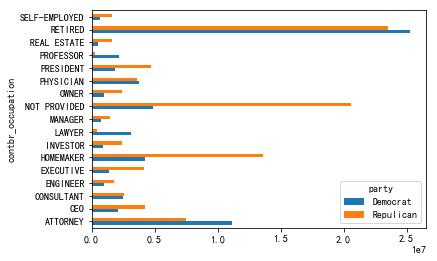

In [12]:
sum_contr.plot(kind='barh')#画图

### 不同职位对主要候选人的统计情况

In [13]:
data.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [14]:
cand_nm=['Obama, Barack','Romney, Mitt']
cand_name=data[data['cand_nm'].isin(cand_nm)]#筛选出'Obama, Barack'和'Romney, Mitt'的数据

In [15]:
cand_name['cand_nm'].unique()

array(['Romney, Mitt', 'Obama, Barack'], dtype=object)

In [16]:
def topn(grouped,b='contbr_occupation',n=5):
    s=grouped.groupby([b])['contb_receipt_amt'].sum().sort_values(ascending=False)[:n]
    return s
cand_name.groupby('cand_nm').apply(topn,n=10)#返回对两位候选人资助最高的前10个职位以及捐赠总数

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
               CEO                   2074974.79
               PRESIDENT             1878509.95
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
               INVESTOR              1537595.12
               CONSULTANT            1424894.01
               PHYSICIAN             1368023.96
Name: c

In [17]:
cand_contb = cand_name.groupby('cand_nm').apply(topn,n=10)
cand_contb_obama = cand_contb['Obama, Barack']
cand_contb_romney = cand_contb['Romney, Mitt']

Text(0,0.5,'出资者的职位')

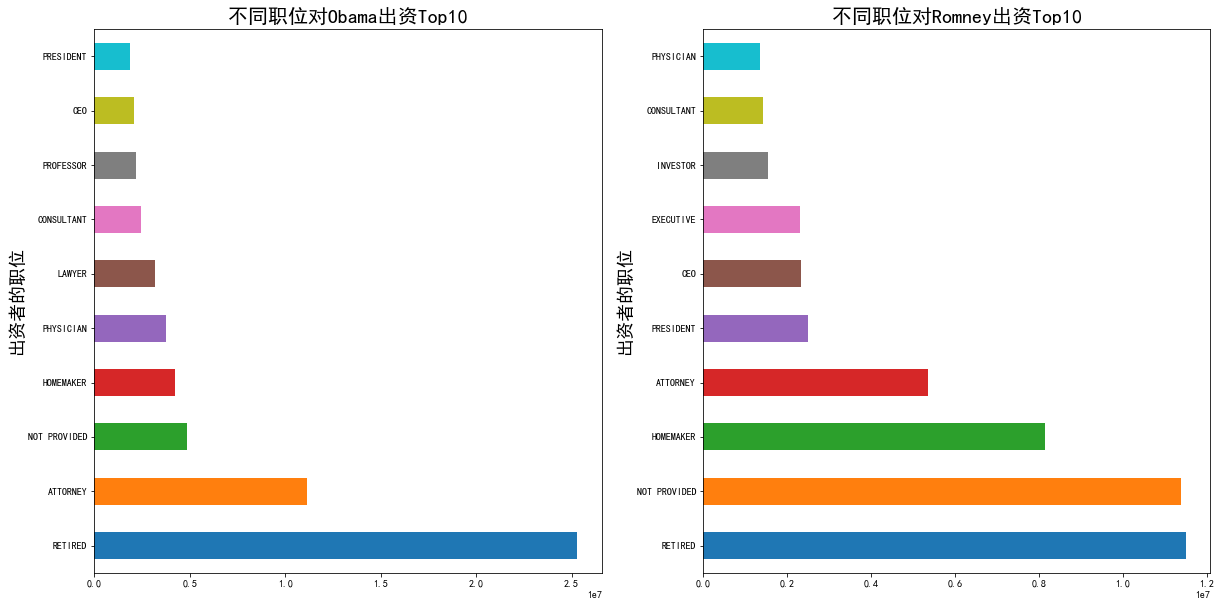

In [18]:
fig=plt.figure(figsize=(20,10))
ax = fig.subplots(1,2)
cand_contb_obama.plot(kind='barh',ax=ax[0])
ax[0].set_title('不同职位对Obama出资Top10',fontsize=20)
ax[0].set_ylabel('出资者的职位',fontsize=18)
cand_contb_romney.plot(kind='barh',ax=ax[1],title='不同职位对Romney出资Top10')
ax[1].set_title('不同职位对Romney出资Top10',fontsize=20)
ax[1].set_ylabel('出资者的职位',fontsize=18)

### 候选人不同的捐赠情况

In [19]:
bins=[0,1,10,100,1000,10000,100000,1000000,10000000]
cut_amt=pd.cut(cand_name['contb_receipt_amt'],bins)#离散化出资数

In [30]:
data1=cand_name.groupby([cut_amt,'cand_nm'])['contb_receipt_amt'].sum().unstack()#基于离散化的出资和候选人进行分组，加和统计出资数

Text(0,0.5,'')

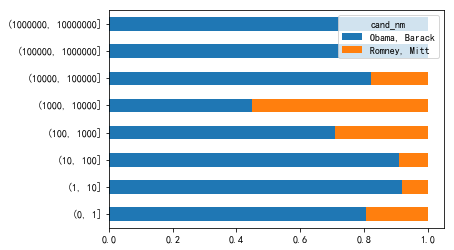

In [34]:
data1.div(data1.sum(1),axis=0).plot(kind='barh',stacked=True)#计算不同区间的百分比,以及画图
plt.ylabel('',fontsize=15)